In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_json("review_data_small.json")
df = pd.json_normalize(df['fields'])
df = df.sort_values(by=["playtime"], ascending=False)

df.head()

,steamid,playtime
0,76561198089309814,250000
95,76561199053585859,203492
96,76561198406911732,116514
98,76561198202562027,110747
3,76561199046178038,98146


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   steamid   100 non-null    object
 1   playtime  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [16]:
print("Max", str(df["playtime"].max()))
print("Min", str(df["playtime"].min()))
print("Mean", str(df["playtime"].mean()))
print("Median", str(df["playtime"].median()))

Max 250000
Min 5
Mean 18272.87
Median 1299.0


array([[<Axes: title={'center': 'playtime'}>]], dtype=object)

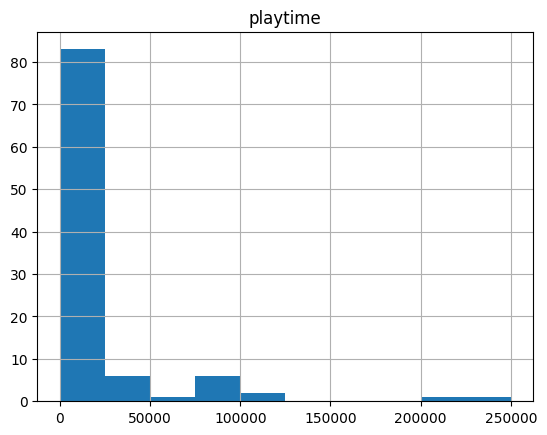

In [17]:
df.hist(column="playtime")

In [18]:
def frequency(user_playtime, all_playtime):
    if not user_playtime:
        return 0
    elif user_playtime == all_playtime:
        return 1
    return user_playtime/(all_playtime - user_playtime)

def rating(frequency_sum):
    return 4 * (1 - frequency_sum) + 1

In [50]:
playtime = df["playtime"].sum()
length = len(df["playtime"])
print(playtime)
print(length)

df2  = df.copy()
df2["Frequency"] = np.nan

for i in range(length):
    all_playtime = playtime - df2.at[i, "playtime"]
    df2.at[i, "Frequency"] = frequency(df2.at[i, "playtime"], all_playtime)

# df.head()
df2.head()

1827287
100


,steamid,playtime,Frequency
0,76561198089309814,250000,0.188354
95,76561199053585859,203492,0.143274
96,76561198406911732,116514,0.073083
98,76561198202562027,110747,0.068967
3,76561199046178038,98146,0.060176


In [51]:
df3 = df2.copy()
df3["Rating"] = np.nan


sum_f = 0
last_f = 0
last_r = 5

for i in range(length):
    f_i = df2.iloc[i][2]

    if sum_f == 0:
        sum_f = f_i
        last_f = f_i
        last_r = 5
        rating_f = 5
        df3.at[i, "Rating"] = 5
    
    else:
        if f_i == last_f:
            sum_f += f_i
            rating_f = last_r
            df3.at[i, "Rating"] = last_r
        else:
            rating_f = rating(sum_f)
            sum_f += f_i
            last_f += f_i
            last_r = rating_f
            df3.at[i, "Rating"] = rating_f
    print(i, sum_f, f_i, rating_f)

df3.head(20)

0 0.1883541389315197 0.1883541389315197 5
1 0.33162779251107277 0.1432736535795531 4.246583444273921
2 0.4047112751823326 0.07308348267125982 3.673488829955709
3 0.4736784459197813 0.06896717073744872 3.38115489927067
4 0.533853982938595 0.06017553701881367 3.1052862163208745
5 0.5934976681050069 0.05964368516641195 2.86458406824562
6 0.6492543974231242 0.05575672931811726 2.6260093275799723
7 0.7036520799375523 0.054397682514428156 2.4029824103075033
8 0.7566712355460774 0.053019155608525145 2.185391680249791
9 0.8065643136390938 0.04989307809301634 1.9733150578156904
10 0.8478502092984079 0.041285895659314197 1.773742745443625
11 0.8765622583940675 0.02871204909565957 1.6085991628063683
12 0.9031618813307235 0.02659962293665601 1.4937509664237298
13 0.929416933536126 0.026255052205402498 1.387352474677106
14 0.952331712672957 0.022914779136831057 1.282332265855496
15 0.971483029325977 0.019151316653019897 1.190673149308172
16 0.9894582259810687 0.01797519665509177 1.1140678826960921


,steamid,playtime,Frequency,Rating
0,76561198089309814,250000,0.188354,5.000000
95,76561199053585859,203492,0.143274,0.415090
96,76561198406911732,116514,0.073083,0.415055
98,76561198202562027,110747,0.068967,0.415018
3,76561199046178038,98146,0.060176,3.381155
84,76561199075980586,97371,0.059644,0.416329
60,76561198955462361,91662,0.055757,0.440877
14,76561198905793377,89647,0.054398,1.282332
81,76561198795592278,87593,0.053019,0.417154
71,76561198077541313,82897,0.049893,0.424835
